In [ ]:
import pandas as pd
from datetime import datetime as dt
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# credits_data = pd.read_csv('credits.csv')
# keywords_data = pd.read_csv('keywords.csv')
# ratings_data = pd.read_csv('ratings.csv')
# links_data = pd.read_csv('links.csv')
movies_data = pd.read_csv('movies_metadata.csv')


<ipython-input-2-a9bfd921ae5e>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_data = pd.read_csv('movies_metadata.csv')


In [ ]:
print(len(movies_data))

45466


Our movies dataset (movies_data) has 45,666 records. That's a lot!

In [ ]:
movies_data.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


Since the columns 'belongs_to_collection', 'homepage', and 'tagline' have more than half of the values missing, it is best to drop these columns entirely from the database

Also, there are some columns with very few missing values relative to the size of the dataset. Let's drop  the records of any column that has at most 5% missing values

In [ ]:
threshold = int(0.05 * len(movies_data))
few_missing_cols = movies_data.columns[(movies_data.isnull().sum() > 0) & (movies_data.isnull().sum() <= threshold)]

half_missing_cols = [col for col in movies_data.columns if movies_data[col].isnull().sum() > int(len(movies_data) * 0.5)]


In [ ]:
print(few_missing_cols)

Index(['imdb_id', 'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
print(half_missing_cols)

['belongs_to_collection', 'homepage', 'tagline']


In [ ]:

movies_data = movies_data.drop(columns = ['belongs_to_collection','homepage', 'tagline'])
movies_data = movies_data.dropna(subset = few_missing_cols)
movies_data.isnull().sum()

,0
adult,0
budget,0
genres,0
id,0
imdb_id,0
original_language,0
original_title,0
overview,0
popularity,0
poster_path,0


Now we've handled the missing values. Let us now view the dataset

In [ ]:
movies_data.loc[0,:]

,0
adult,False
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."
popularity,21.946943
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg


We don't need 'overview', 'poster_path', 'spoken_languages', 'status', or 'imdb_id'. Let's get rid of those

In [ ]:
movies_data = movies_data.drop(columns = ['overview', 'poster_path', 'spoken_languages', 'status', 'imdb_id', 'original_title'])

In [ ]:
movies_data.loc[0,:]

,0
adult,False
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
id,862
original_language,en
popularity,21.946943
production_companies,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
production_countries,"[{'iso_3166_1': 'US', 'name': 'United States o..."
release_date,1995-10-30
revenue,373554033.0


Now let's import our rating.csv file

In [ ]:
ratings_data = pd.read_csv('ratings.csv')


In [ ]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
movies_data = movies_data.rename(columns = {'id':'movieId'})

In [ ]:
print(ratings_data['movieId'].dtype)
print(movies_data['movieId'].dtype)


int64
object


In [ ]:
movies_data['movieId'] = movies_data['movieId'].astype(int)

In [ ]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
ratings_data = ratings_data[ratings_data['userId']<20000]
len(ratings_data)

1927397

In [ ]:
ratings_data.nunique()

,0
userId,19999
movieId,23173
rating,10
timestamp,1575763


In [ ]:
combined_data = ratings_data.merge(movies_data, on='movieId', how='inner')


In [ ]:
combined_data.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
adult,0
budget,0
genres,0
original_language,0
popularity,0
production_companies,0


Let's convert the 'timestamp to the same data format as the release_date column

In [ ]:
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'], unit='s')

combined_data['timestamp'] = combined_data['timestamp'].dt.strftime('%Y-%m-%d')
combined_data.head()


,userId,movieId,rating,timestamp,adult,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,video,vote_average,vote_count
0,1,110,1.0,2015-03-09,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",fr,7.832755,"[{'name': 'Zespół Filmowy TOR', 'id': 38}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1994-05-27,0.0,99.0,Three Colors: Red,False,7.8,246.0
1,1,147,4.5,2015-03-09,False,0,"[{'id': 18, 'name': 'Drama'}]",fr,7.268688,"[{'name': 'Les Films du Carrosse', 'id': 53}, ...","[{'iso_3166_1': 'FR', 'name': 'France'}]",1959-05-04,0.0,99.0,The 400 Blows,False,8.0,363.0
2,1,858,5.0,2015-03-09,False,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,10.234919,"[{'name': 'TriStar Pictures', 'id': 559}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-06-24,227799884.0,105.0,Sleepless in Seattle,False,6.5,630.0
3,1,1246,5.0,2015-03-09,False,24000000,"[{'id': 18, 'name': 'Drama'}]",en,11.697604,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-12-20,155721132.0,102.0,Rocky Balboa,False,6.5,858.0
4,1,1968,4.0,2015-03-09,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,6.285574,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-02-14,29481428.0,109.0,Fools Rush In,False,5.8,133.0


In [ ]:
combined_data = combined_data.rename(columns = {'timestamp':'review_date'})

In [ ]:
combined_data['time_between_release_and_review'] = (pd.to_datetime(combined_data['review_date']) - pd.to_datetime(combined_data['release_date'])).dt.days

combined_data['days_since_release'] = (dt.today() - pd.to_datetime(combined_data['release_date'])).dt.days

combined_data['days_since_review'] = (dt.today() - pd.to_datetime(combined_data['review_date'])).dt.days

combined_data.drop(columns = ['review_date', 'release_date'], inplace = True)
print(combined_data['days_since_release'][:5])
print(combined_data['time_between_release_and_review'][:5])

0    11119
1    23926
2    11456
3     6529
4    10125
Name: days_since_release, dtype: int64
0     7591
1    20398
2     7928
3     3001
4     6597
Name: time_between_release_and_review, dtype: int64


Now lets convert parse the genres column into a list of dictionaries


In [ ]:
combined_data['genres'] = combined_data['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
combined_data['genre_ids'] = combined_data['genres'].apply(lambda x: [genre['id'] for genre in x] )
combined_data['genre_names'] = combined_data['genres'].apply(lambda x: [genre['name'] for genre in x] )

In [ ]:
combined_data.drop(columns = ['genres'], inplace = True)

In [ ]:
combined_data['production_companies'] = combined_data['production_companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
combined_data['production_ids'] = combined_data['production_companies'].apply(lambda x: [genre['id'] for genre in x] )
combined_data['production_names'] = combined_data['production_companies'].apply(lambda x: [genre['name'] for genre in x] )

In [ ]:
combined_data.drop(columns = ['production_companies'], inplace = True)
combined_data.head()
#

,userId,movieId,rating,adult,budget,original_language,popularity,production_countries,revenue,runtime,...,video,vote_average,vote_count,time_between_release_and_review,days_since_release,days_since_review,genre_ids,genre_names,production_ids,production_names
0,1,110,1.0,False,0,fr,7.832755,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",0.0,99.0,...,False,7.8,246.0,7591,11119,3528,"[18, 9648, 10749]","[Drama, Mystery, Romance]","[38, 183, 591, 1245]","[Zespół Filmowy TOR, Le Studio Canal+, France ..."
1,1,147,4.5,False,0,fr,7.268688,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,99.0,...,False,8.0,363.0,20398,23926,3528,[18],[Drama],"[53, 10897, 10932]","[Les Films du Carrosse, Sédif Productions, The..."
2,1,858,5.0,False,21000000,en,10.234919,"[{'iso_3166_1': 'US', 'name': 'United States o...",227799884.0,105.0,...,False,6.5,630.0,7928,11456,3528,"[35, 18, 10749]","[Comedy, Drama, Romance]",[559],[TriStar Pictures]
3,1,1246,5.0,False,24000000,en,11.697604,"[{'iso_3166_1': 'US', 'name': 'United States o...",155721132.0,102.0,...,False,6.5,858.0,3001,6529,3528,[18],[Drama],"[5, 497, 696, 8411]","[Columbia Pictures, Revolution Studios, Rogue ..."
4,1,1968,4.0,False,0,en,6.285574,"[{'iso_3166_1': 'US', 'name': 'United States o...",29481428.0,109.0,...,False,5.8,133.0,6597,10125,3528,"[18, 35, 10749]","[Drama, Comedy, Romance]",[5],[Columbia Pictures]


In [ ]:
combined_data['production_countries'][0]

"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'PL', 'name': 'Poland'}, {'iso_3166_1': 'CH', 'name': 'Switzerland'}]"

In [ ]:
combined_data['production_countries'] = combined_data['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
combined_data['production_country_ids'] = combined_data['production_countries'].apply(lambda x: [genre['iso_3166_1'] for genre in x] )
combined_data['production_country_names'] = combined_data['production_countries'].apply(lambda x: [genre['name'] for genre in x] )

combined_data.drop(columns = ['production_countries'], inplace = True)

In [ ]:
combined_data.loc[0,:]

,0
userId,1
movieId,110
rating,1.0
adult,False
budget,0
original_language,fr
popularity,7.832755
revenue,0.0
runtime,99.0
title,Three Colors: Red


Lets convert the bool datatypes to int. These include the 'adult' and 'video' columns

In [ ]:
combined_data['video'] = combined_data['video'].astype(bool).astype(int)
combined_data['adult'] = combined_data['adult'].astype(bool).astype(int)

In [ ]:
len(combined_data)

842073

Let's see how many different languages we have in original_language

In [ ]:
language_values = combined_data['original_language'].unique()


In [ ]:
languages = combined_data['original_language'].value_counts()
print(languages)

original_language
en    622073
fr     65275
de     53889
ja     16855
es     16494
it     10808
ru     10627
hi      7432
sv      4413
da      4336
nl      4109
fi      3656
ko      2784
zh      2696
pl      2621
mn      1938
cs      1927
bs      1368
zu      1325
th      1232
pt      1203
fa      1179
he      1053
cn       975
et       360
ro       355
xx       214
hu       187
bn       148
no       118
tr        86
te        77
kk        74
sr        62
ca        18
ta        17
el        16
is        13
uk        11
ka        10
tl        10
sk         6
af         6
mr         5
id         4
bg         3
hr         2
eu         1
lo         1
wo         1
Name: count, dtype: int64


There are too many languages to create encoding column for all of them. Let's instead retain languages with more than 10000 occurences, and for the rest, create a separate language column labeled 'Rare Language'

In [ ]:
rare_languages = languages[languages <= 10000]
rare_languages = rare_languages.index.tolist()
combined_data['Rare Language'] = combined_data['original_language'].apply(lambda x: 1 if x in rare_languages else 0)
combined_data['original_language'] = combined_data['original_language'].apply(lambda x: 'Rare' if x in rare_languages else x)



In [ ]:
combined_data['original_language'].value_counts()

,count
original_language,
en,622073
fr,65275
de,53889
Rare,46052
ja,16855
es,16494
it,10808
ru,10627


Now let us encode the 'original_language' column using pd.getdummies

In [ ]:
combined_data = pd.get_dummies(combined_data, columns=['original_language'])


Let's drop movies which have less than 10 reviews, as this

In [ ]:
combined_data['movie_count'] = combined_data.groupby('movieId')['movieId'].transform('count')


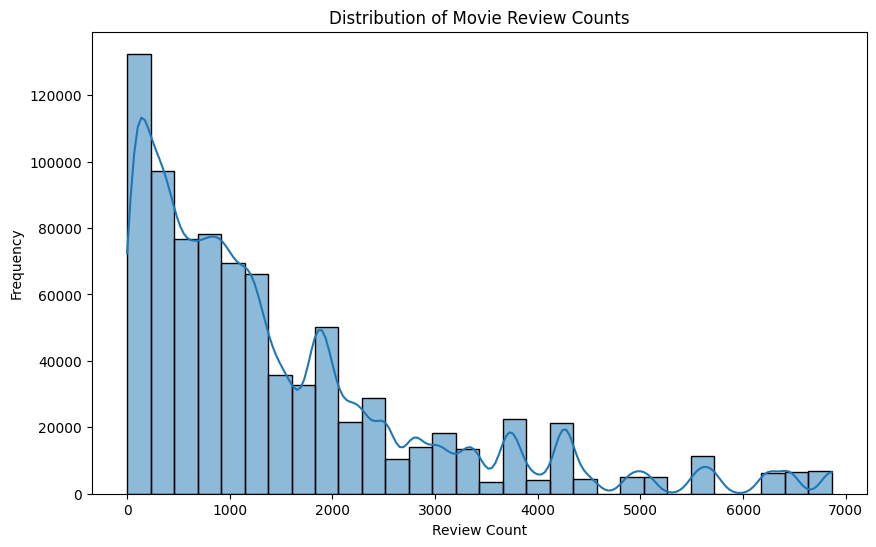

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['movie_count'], kde=True, bins=30)
plt.title('Distribution of Movie Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()


Let's remove any movies which have less than 20 ratings

In [ ]:
combined_data = combined_data[combined_data['movie_count'] >= 20]


Let's do a weighted rating system to adjust for movies with relatively fewer ratings

In [ ]:
C = combined_data['rating'].mean()

# Step 2: Set the minimum number of votes required to calculate a weighted rating
m = 20  # Since you've already filtered with >= 20

# Step 3: Calculate the weighted rating for each movie
combined_data['weighted_rating'] = (
    (combined_data['movie_count'] / (combined_data['movie_count'] + m)) * combined_data['rating'] +
    (m / (combined_data['movie_count'] + m)) * C
)

In [ ]:
combined_data.loc[0,:]

,0
userId,1
movieId,110
rating,1.0
adult,1
budget,0
popularity,7.832755
revenue,0.0
runtime,99.0
title,Three Colors: Red
video,0


**Each rating has information about the voter who rated it: how many ratings that voter has given(vote_count) and the average rating of that voter(vote_average). Let us use these features to create some new features such as:**


1.   Reliability of the voter(voter's average rating compared to all voters' average rating)
2.   Voter experience(Total reviews * review value)
3. Voter activity level - low, medium, or high
4. Voter consistency: Here we will calculate the standard deviation of the voter's ratings



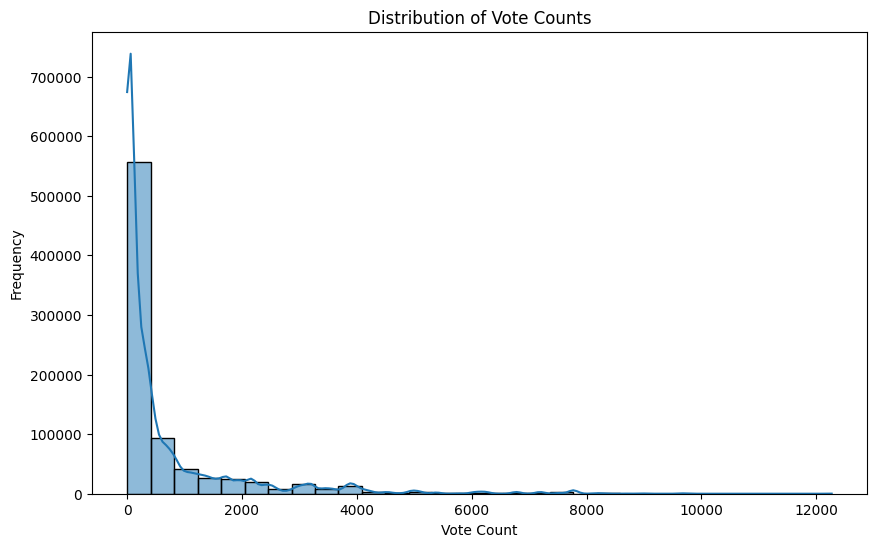

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['vote_count'], kde=True, bins=30)
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Voter Category
bins = [0, 400, 2000, np.inf]
labels = ['Low', 'Medium', 'High']
combined_data['voter_activity_level'] = pd.cut(combined_data['vote_count'], bins=bins, labels=labels)
# Generate dummy variables for the 'voter_activity_level' column
voter_activity_dummies = pd.get_dummies(combined_data['voter_activity_level'], prefix='voter_activity')

# Concatenate the dummy variables to the original DataFrame
combined_data = pd.concat([combined_data, voter_activity_dummies], axis=1)

# Voter Reliability
average_rating = combined_data['rating'].mean()
combined_data['voter_reliability'] = combined_data['vote_average'] / average_rating

# Voter Experience
combined_data['voter_experience'] = combined_data['vote_count'] * combined_data['rating']

# Voter consistency

combined_data['voter_consistency'] = combined_data.groupby('userId')['rating'].transform(lambda x: x.quantile(0.75) - x.quantile(0.25))



Let us see the unique genres available

In [ ]:
genre_ids = combined_data['genre_ids'].explode().unique()
genre_names = combined_data['genre_names'].explode().unique()
genre_names

array(['Drama', 'Mystery', 'Romance', 'Comedy', 'Crime', 'Action',
       'Foreign', 'Documentary', 'War', 'Adventure', 'Fantasy', 'History',
       'Thriller', 'Horror', 'Science Fiction', 'Music', 'Family',
       'Western', 'TV Movie', 'Animation', nan], dtype=object)

Let's see number of times nan appears

In [ ]:
combined_data = combined_data.explode('genre_names')  # Flatten the list
combined_data = pd.get_dummies(combined_data, columns=['genre_names'], prefix='genre')

# Check the result
combined_data.iloc[0,12:]

,0
time_between_release_and_review,7591
days_since_release,11119
days_since_review,3528
genre_ids,"[18, 9648, 10749]"
production_ids,"[38, 183, 591, 1245]"
production_names,"[Zespół Filmowy TOR, Le Studio Canal+, France ..."
production_country_ids,"[FR, PL, CH]"
production_country_names,"[France, Poland, Switzerland]"
Rare Language,0
original_language_Rare,False


Let's try and reduce the dimenionality of the genre columns using PCA

In [ ]:
combined_data.rename(columns = {'genre_ids':'genreIds'}, inplace = True)
genre_columns = combined_data.filter(like='genre_').columns

pca = PCA(n_components=5)
pca_features = pca.fit_transform(combined_data[genre_columns])
combined_data_reduced = combined_data.copy()
pca_df = pd.DataFrame(pca_features, columns=[f'genre_{i+1}' for i in range(5)])
combined_data = combined_data_reduced.drop(columns=genre_columns).join(pca_df)


combined_data.iloc[0,:]

,0
userId,1
movieId,110
rating,1.0
adult,1
budget,0
popularity,7.832755
revenue,0.0
runtime,99.0
title,Three Colors: Red
video,0


Let's now add a column to indicate if revenue is 0

In [ ]:
combined_data['is_zero_revenue'] = combined_data['revenue'] == 0

Lets get rid of these columns: production_ids,production_names, production_country_ids, production_country_names

In [ ]:
combined_data.drop(columns = ['production_ids', 'production_names', 'production_country_ids', 'production_country_names'], inplace = True)

In [ ]:
combined_data.iloc[0,:]

,0
userId,1
movieId,110
rating,1.0
adult,1
budget,0
popularity,7.832755
revenue,0.0
runtime,99.0
title,Three Colors: Red
video,0


In [ ]:
numerical_columns = ['rating', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'time_between_release_and_review', 'days_since_release', 'days_since_review', 'movie_count', 'weighted_rating', 'voter_reliability', 'voter_experience', 'voter_consistency']
bool_columns = combined_data.select_dtypes(bool).columns
combined_data[bool_columns] = combined_data[bool_columns].astype(int)
combined_data[numerical_columns] = combined_data[numerical_columns].astype(float)

scaler = StandardScaler()
combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])

combined_data.iloc[0,:]

,0
userId,1
movieId,110
rating,-2.40349
adult,1
budget,-0.56034
popularity,-0.127274
revenue,-0.455469
runtime,-0.438219
title,Three Colors: Red
video,0


In [ ]:
combined_data.drop(columns='voter_activity_level', inplace=True)


In [ ]:

combined_data.isnull().sum()

,0
userId,0
movieId,0
rating,0
adult,0
budget,0
popularity,0
revenue,0
runtime,0
title,0
video,0


In [ ]:
STOP

NameError: name 'STOP' is not defined

We will now train our model. We no longer need userId, movieId, title, genreIds, so let's create another dataframe without those columns

In [ ]:
model_data = combined_data.drop(columns = ['userId', 'movieId', 'title', 'genreIds'])


In [ ]:
model_data.iloc[0,:]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming `model_data` is your DataFrame with necessary features
features = model_data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

# Assuming model_data has been preprocessed and unnecessary columns dropped
n_clusters = 10  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model and assign clusters to the data
model_data['cluster'] = kmeans.fit_predict(model_data)

# Example function to recommend movies based on cluster
def recommend_from_cluster(movie_index, n_recommendations=5):
    cluster_id = model_data.loc[movie_index, 'cluster']
    recommended_movies = model_data[model_data['cluster'] == cluster_id].drop(index=movie_index)

    # Sort by a metric, e.g., rating, if applicable
    return recommended_movies.sort_values(by='rating', ascending=False).head(n_recommendations)

# Example usage
movie_index = 0  # Replace with the index of the movie you're interested in
print(recommend_from_cluster(movie_index))


In [ ]:
# Assuming model_data is a pandas DataFrame that you've created earlier
import pandas as pd

# Count the total number of missing values and the number of records with at least one missing value
missing_values_count = model_data.isnull().sum().sum()  # Total number of missing values
missing_records_count = model_data.isnull().any(axis=1).sum()  # Number of records with at least one missing value

print(f"Total missing values: {missing_values_count}")
print(f"Number of records with missing values: {missing_records_count}")

print(len(model_data))